<a href="https://colab.research.google.com/github/Tanushree-6/Tanushree-6-DLM_Term-3/blob/main/LSTM_Group_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STOCK PRICE PREDICTION USING LSTM**

### Rahul Bajaj (055036)  || Tanushree Nangia (055052)
### Section K
### Group 11

## **Project Information**

This project aims to predict stock prices using Long Short-Term Memory (LSTM) networks. The dataset used consists of JSW Steel's historical stock prices sourced from Yahoo Finance. The model is implemented using Python, TensorFlow, and related data processing libraries.

## **Description of Data**

The dataset contains stock price information for JSW Steel over the past two years with an hourly interval. The main variable used for prediction is the 'Close' price, which represents the last traded price for a given time period. The data is normalized using MinMaxScaler to enhance model efficiency.

## **Project Objectives**

The primary objective of this project is to build a deep learning model capable of predicting stock prices based on historical trends. By leveraging LSTM networks, which are designed to handle sequential data, the project aims to capture intricate patterns in stock price movements. Additionally, the project seeks to evaluate the performance of the model using key metrics such as loss and accuracy to determine its predictive power. Through this analysis, the project also intends to explore the feasibility of using LSTM for financial forecasting and highlight potential challenges and improvements needed for real-world implementation.

## **Problem Statements**

- How effectively can LSTM models predict future stock prices based on historical trends, and what patterns can they reliably capture?

- To what extent can the model accurately predict short-term price fluctuations, and how does its performance vary across different market conditions?

- What are the key challenges, limitations, and areas for improvement in using LSTM for stock price forecasting, and how can they be addressed to enhance predictive accuracy?

## **Observations and  Findings**
- The model successfully learned patterns from the historical stock prices.
- The training loss reduced significantly over the epochs, showing effective learning.
- The validation loss and Mean Absolute Error (MAE) fluctuated, indicating that the model may require further tuning.
- Using Mean Absolute Percentage Error (MAPE) metric, the accuracy while training te first model is 99.0%1 whereas for the tuned model it is 97.82%.

- Key results:

 Final training loss: ~0.0006

 Final validation loss: ~0.0007

 Final training MAE: ~0.0179

 Final validation MAE: ~0.0218

- The model performed well on training data but showed some variations on validation data, which suggests potential overfitting.
- We have also calculated the correlation between the NIfty50 Stock Index and JSW Steel Stock Price -

 Correlation on actual data is 0.9430

 Correaltion on predicted data is 0.01

## **Managerial Insights and Recommendations**

- LSTM is effective in capturing stock price trends but is sensitive to hyperparameters and data preprocessing techniques.

- The model can be enhanced with more features such as trading volume, macroeconomic indicators, and news sentiment.

- Further improvements can be achieved by increasing the number of epochs, fine-tuning the LSTM layers, and using advanced techniques like attention mechanisms.

- While the model provides useful predictions, real-world stock trading requires consideration of external factors such as market news, economic policies, and investor sentiment.


## **Analysis of Data**


In [ ]:
!pip install yfinance mape

ERROR: Could not find a version that satisfies the requirement mape (from versions: none)
ERROR: No matching distribution found for mape


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Download NIFTY 50 data (last 20 years)
rb36tn52_nifty_data = yf.download('^NSEI', period = '730d', interval = '1h')

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Extract closing prices
rb36tn52_df = rb36tn52_nifty_data[['Close']]

In [ ]:
# Normalize data
rb36tn52_scaler = MinMaxScaler(feature_range=(0, 1))
rb36tn52_data_scaled = rb36tn52_scaler.fit_transform(rb36tn52df)


In [ ]:
#show data
rb36tn52df.head()


Price,Close
Ticker,^NSEI
Datetime,
2022-04-19 03:45:00+00:00,17194.099609
2022-04-19 04:45:00+00:00,17194.000000
2022-04-19 05:45:00+00:00,17238.199219
2022-04-19 06:45:00+00:00,17181.500000
2022-04-19 07:45:00+00:00,17245.400391


In [ ]:
# Prepare training data
def rb36tn52_create_sequences(rb36tn52_data, rb36tn52_time_step):
    rb36tn52_X, rb36tn52_y = [], []
    for i in range(len(rb36tn52_data) - rb36tn52_time_step - 1):
        rb36tn52_X.append(rb36tn52_data[i:(i + rb36tn52_time_step), 0])
        rb36tn52_y.append(rb36tn52_data[i + rb36tn52_time_step, 0])
    return np.array(rb36tn52_X), np.array(rb36tn52_y)


In [ ]:
rb36tn52_time_step = 60  # Using past 60 days for prediction
rb36tn52_X, rb36tn52_y = rb36tn52_create_sequences(rb36tn52_data_scaled, rb36tn52_time_step)


In [ ]:
# Split into training and testing sets
rb36tn52_split_ratio = 0.8
rb36tn52_split = int(len(rb36tn52_X) * rb36tn52_split_ratio)
rb36tn52_X_train, rb36tn52_X_test = rb36tn52_X[:rb36tn52_split], rb36tn52_X[rb36tn52_split:]
rb36tn52_y_train, rb36tn52_y_test = rb36tn52_y[:rb36tn52_split], rb36tn52_y[rb36tn52_split:]



In [ ]:
# Reshape for LSTM input
rb36tn52_X_train = rb36tn52_X_train.reshape((rb36tn52_X_train.shape[0], rb36tn52_X_train.shape[1], 1))
rb36tn52_X_test = rb36tn52_X_test.reshape((rb36tn52_X_test.shape[0], rb36tn52_X_test.shape[1], 1))


In [ ]:
# Build LSTM Model
rb36tn52_model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(rb36tn52_time_step, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=25, activation='relu'),
    Dense(units=1)
])

rb36tn52_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,101 (203.52 KB)

 Trainable params: 52,101 (203.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
rb36tn52_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])


In [ ]:
# Define accuracy metric (Mean Absolute Percentage Error - MAPE)
def rb36tn52_mape(rb36tn52_y_true, rb36tn52_y_pred_nifty):
    rb36tn52_y_true, rb36tn52_y_pred_nifty = np.array(rb36tn52_y_true), np.array(rb36tn52_y_pred_nifty)
    rb36tn52_nonzero_idx = rb36tn52_y_true != 0  # Avoid division by zero
    return np.mean(np.abs((rb36tn52_y_true[rb36tn52_nonzero_idx] - rb36tn52_y_pred_nifty[rb36tn52_nonzero_idx]) / rb36tn52_y_true[rb36tn52_nonzero_idx])) * 100


In [ ]:
# Custom callback to print loss and accuracy after each epoch
class rb36tn52_EpochCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, rb36tn52_epoch, rb36tn52_logs=None):
        print(f"Epoch {rb36tn52_epoch+1}: Loss = {rb36tn52_logs['loss']:.4f}, "
              f"Val Loss = {rb36tn52_logs['val_loss']:.4f}, "
              f"MAE = {rb36tn52_logs['mae']:.4f}, "
              f"Val MAE = {rb36tn52_logs['val_mae']:.4f}")


In [ ]:
# Train the model and store training history
rb36tn52_history = rb36tn52_model.fit(rb36tn52_X_train, rb36tn52_y_train, epochs=10, batch_size=32, validation_data=(rb36tn52_X_test, rb36tn52_y_test), callbacks=[rb36tn52_EpochCallback()])



Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0330 - mae: 0.1133Epoch 1: Loss = 0.0108, Val Loss = 0.0004, MAE = 0.0600, Val MAE = 0.0159
126/126 ━━━━━━━━━━━━━━━━━━━━ 18s 99ms/step - loss: 0.0328 - mae: 0.1129 - val_loss: 3.9884e-04 - val_mae: 0.0159
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0017 - mae: 0.0294Epoch 2: Loss = 0.0016, Val Loss = 0.0005, MAE = 0.0283, Val MAE = 0.0183
126/126 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - loss: 0.0017 - mae: 0.0294 - val_loss: 5.0002e-04 - val_mae: 0.0183
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0015 - mae: 0.0272Epoch 3: Loss = 0.0015, Val Loss = 0.0024, MAE = 0.0275, Val MAE = 0.0442
126/126 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step - loss: 0.0015 - mae: 0.0272 - val_loss: 0.0024 - val_mae: 0.0442
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0011 - mae: 0.0241Epoch 4: Loss = 0.0011, Val Loss = 0.0006, MAE = 0.0239, Val MAE = 0.0205
126/126 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - 

In [ ]:
rb36tn52_model.save('LSTMNifty.keras')


In [ ]:
# Predict on test data
rb36tn52_y_pred_nifty = rb36tn52_model.predict(rb36tn52_X_test)
rb36tn52_y_pred_nifty = rb36tn52_scaler.inverse_transform(rb36tn52_y_pred_nifty.reshape(-1, 1))
rb36tn52_y_test_actual = rb36tn52_scaler.inverse_transform(rb36tn52_y_test.reshape(-1, 1))


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step


In [ ]:
# Calculate accuracy using MAPE
rb36tn52_accuracy = 100 - rb36tn52_mape(rb36tn52_y_test_actual, rb36tn52_y_pred_nifty)
print(f"Final Model Accuracy: {rb36tn52_accuracy:.2f}%")


Final Model Accuracy: 99.01%


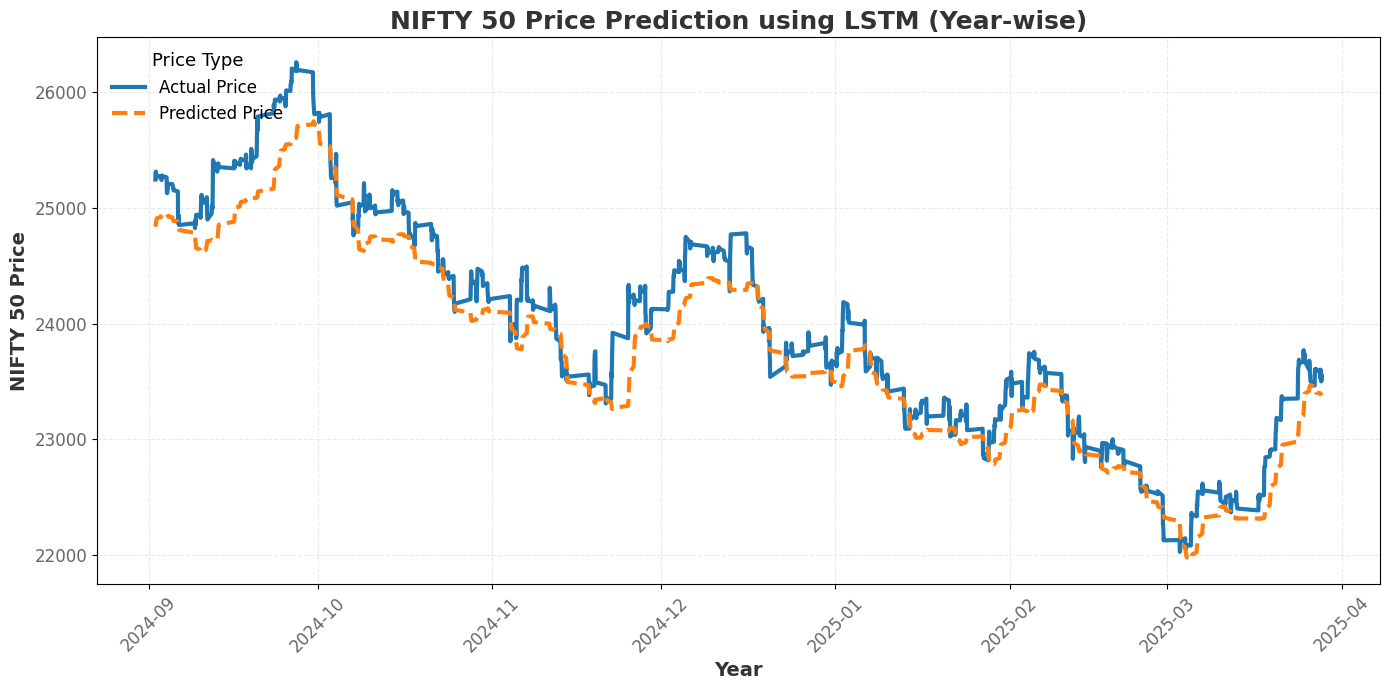

In [ ]:
import matplotlib.pyplot as plt

# Plot results year-wise with improved aesthetics
plt.figure(figsize=(14, 7))

# Plot Actual Price with a smooth color and thicker line
plt.plot(rb36tn52_nifty_data.index[rb36tn52_split + rb36tn52_time_step + 1:], rb36tn52_y_test_actual,
         label='Actual Price', color='#1f77b4', linewidth=3)

# Plot Predicted Price with a contrasting color and dashed line style
plt.plot(rb36tn52_nifty_data.index[rb36tn52_split + rb36tn52_time_step + 1:], rb36tn52_y_pred_nifty,
         label='Predicted Price', color='#ff7f0e', linewidth=3, linestyle='--')

# Customize plot title and labels
plt.title('NIFTY 50 Price Prediction using LSTM (Year-wise)', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Year', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('NIFTY 50 Price', fontsize=14, fontweight='bold', color='#333333')

# Customize tick labels
plt.xticks(rotation=45, fontsize=12, color='#666666')
plt.yticks(fontsize=12, color='#666666')

# Add a grid with soft lines for better readability
plt.grid(True, linestyle='--', alpha=0.4, color='#cccccc')

# Place the legend in the top left with a transparent background
plt.legend(fontsize=12, loc='upper left', frameon=False, title='Price Type', title_fontsize=13)

# Make sure the layout does not cut off any labels
plt.tight_layout()

# Display the plot
plt.show()


## **JSW Steel**

[*********************100%***********************]  1 of 1 completed


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step
Final Model Accuracy: 97.99%


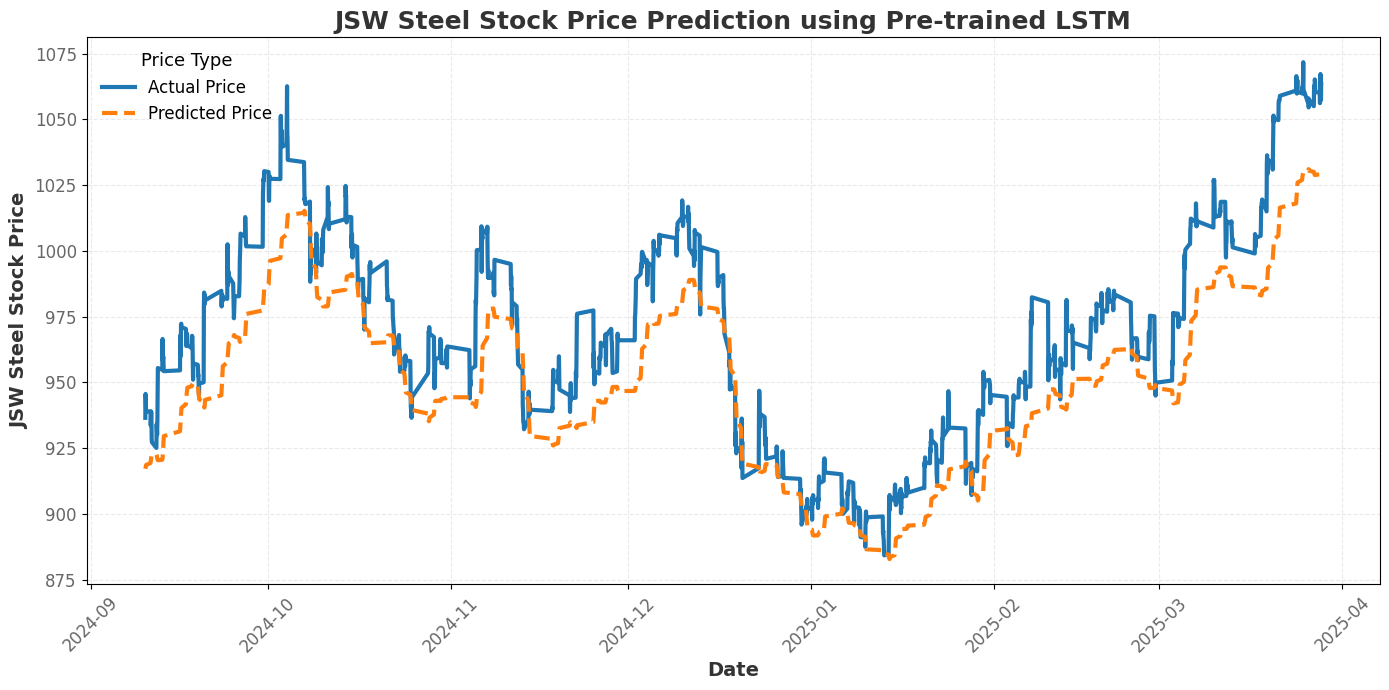

In [ ]:
import numpy as np
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Download JSW Steel stock data (last 2 years)
rb36tn52_jsw_data = yf.download('JSWSTEEL.NS', period='730d', interval='1h')

# Extract closing prices
rb36tn52_data = rb36tn52_jsw_data[['Close']]

# Step 1: Split Data Before Normalization
rb36tn52_split_ratio = 0.8
rb36tn52_split = int(len(rb36tn52_data) * rb36tn52_split_ratio)

rb36tn52_train_data = rb36tn52_data.iloc[:rb36tn52_split]  # Training data
rb36tn52_test_data = rb36tn52_data.iloc[rb36tn52_split:]   # Testing data

# Step 2: Normalize only on training data
rb36tn52_scaler = MinMaxScaler(feature_range=(0, 1))
rb36tn52_train_scaled = rb36tn52_scaler.fit_transform(rb36tn52_train_data[['Close']])
rb36tn52_test_scaled = rb36tn52_scaler.transform(rb36tn52_test_data[['Close']])  # Transform test data

# Step 3: Prepare sequences using test data
def rb36tn52_create_sequences(rb36tn52_data, rb36tn52_time_step):
    rb36tn52_X, rb36tn52_y = [], []
    for i in range(len(rb36tn52_data) - rb36tn52_time_step - 1):
        rb36tn52_X.append(rb36tn52_data[i:(i + rb36tn52_time_step), 0])
        rb36tn52_y.append(rb36tn52_data[i + rb36tn52_time_step, 0])
    return np.array(rb36tn52_X), np.array(rb36tn52_y)

rb36tn52_time_step = 60  # Using past 60 days for prediction
rb36tn52_X_test, rb36tn52_y_test = rb36tn52_create_sequences(rb36tn52_test_scaled, rb36tn52_time_step)

# Reshape for LSTM input
rb36tn52_X_test = rb36tn52_X_test.reshape((rb36tn52_X_test.shape[0], rb36tn52_X_test.shape[1], 1))

# Load pre-trained model
rb36tn52_model = load_model('LSTMNifty.keras')

# Predict on the test set
rb36tn52_y_pred_jsw = rb36tn52_model.predict(rb36tn52_X_test)
rb36tn52_y_pred_jsw = rb36tn52_scaler.inverse_transform(rb36tn52_y_pred_jsw.reshape(-1, 1))
rb36tn52_y_test_actual = rb36tn52_scaler.inverse_transform(rb36tn52_y_test.reshape(-1, 1))  # Correct inverse transform

# Define accuracy metric (Mean Absolute Percentage Error - MAPE)
def rb36tn52_mape(rb36tn52_y_true, rb36tn52_y_pred):
    rb36tn52_y_true, rb36tn52_y_pred = np.array(rb36tn52_y_true), np.array(rb36tn52_y_pred)
    rb36tn52_nonzero_idx = rb36tn52_y_true != 0  # Avoid division by zero
    return np.mean(np.abs((rb36tn52_y_true[rb36tn52_nonzero_idx] - rb36tn52_y_pred[rb36tn52_nonzero_idx]) / rb36tn52_y_true[rb36tn52_nonzero_idx])) * 100

# Calculate accuracy using MAPE
rb36tn52_accuracy = 100 - rb36tn52_mape(rb36tn52_y_test_actual, rb36tn52_y_pred_jsw)
print(f"Final Model Accuracy: {rb36tn52_accuracy:.2f}%")

# Plot results with improved aesthetics
plt.figure(figsize=(14, 7))

# Plot Actual Price with a smooth color and thicker line
plt.plot(rb36tn52_test_data.index[rb36tn52_time_step + 1:], rb36tn52_y_test_actual, label='Actual Price', color='#1f77b4', linewidth=3)

# Plot Predicted Price with a contrasting color and dashed line style
plt.plot(rb36tn52_test_data.index[rb36tn52_time_step + 1:], rb36tn52_y_pred_jsw, label='Predicted Price', color='#ff7f0e', linewidth=3, linestyle='--')

# Customize plot title and labels
plt.title('JSW Steel Stock Price Prediction using Pre-trained LSTM', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Date', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('JSW Steel Stock Price', fontsize=14, fontweight='bold', color='#333333')

# Customize tick labels
plt.xticks(rotation=45, fontsize=12, color='#666666')
plt.yticks(fontsize=12, color='#666666')

# Add a grid with soft lines for better readability
plt.grid(True, linestyle='--', alpha=0.4, color='#cccccc')

# Place the legend in the top left with a transparent background
plt.legend(fontsize=12, loc='upper left', frameon=False, title='Price Type', title_fontsize=13)

# Make sure the layout does not cut off any labels
plt.tight_layout()

# Display the plot
plt.show()


## **Nifty 50 vs JSW Steel (Original Price Comparison)**

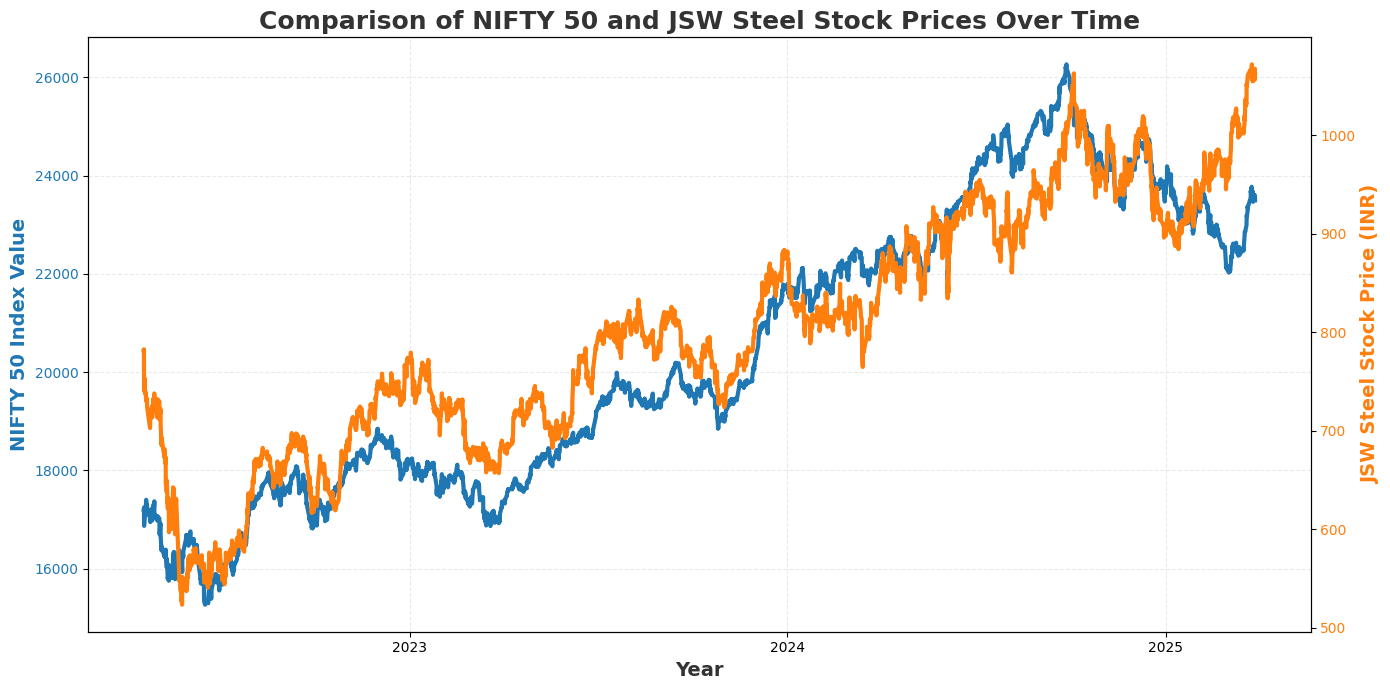

In [ ]:
import matplotlib.dates as mdates

# Ensure both datasets have the same timeframe
rb36tn52_common_dates = rb36tn52_nifty_data.index.intersection(rb36tn52_jsw_data.index)
rb36tn52_nifty_common = rb36tn52_nifty_data.loc[rb36tn52_common_dates]['Close']
rb36tn52_jsw_common = rb36tn52_jsw_data.loc[rb36tn52_common_dates]['Close']

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(14,7))

# Plot NIFTY 50 on primary y-axis
ax1.plot(rb36tn52_common_dates, rb36tn52_nifty_common, label='NIFTY 50 Index', color='#1f77b4', linewidth=3)
ax1.set_xlabel('Year', fontsize=14, fontweight='bold', color='#333333')
ax1.set_ylabel('NIFTY 50 Index Value', color='#1f77b4', fontsize=14, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='#1f77b4')
ax1.grid(True, linestyle='--', alpha=0.4, color='#cccccc')

# Create secondary y-axis for JSW Steel stock
ax2 = ax1.twinx()
ax2.plot(rb36tn52_common_dates, rb36tn52_jsw_common, label='JSW Steel Stock Price', color='#ff7f0e', linewidth=3)
ax2.set_ylabel('JSW Steel Stock Price (INR)', color='#ff7f0e', fontsize=14, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='#ff7f0e')

# Set title and format x-axis
plt.title('Comparison of NIFTY 50 and JSW Steel Stock Prices Over Time', fontsize=18, fontweight='bold', color='#333333')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, fontsize=12, color='#666666')

# Show plot
plt.tight_layout()
plt.show()


## **Nifty 50 vs JSW Steel (Predicted Price Comparison)**

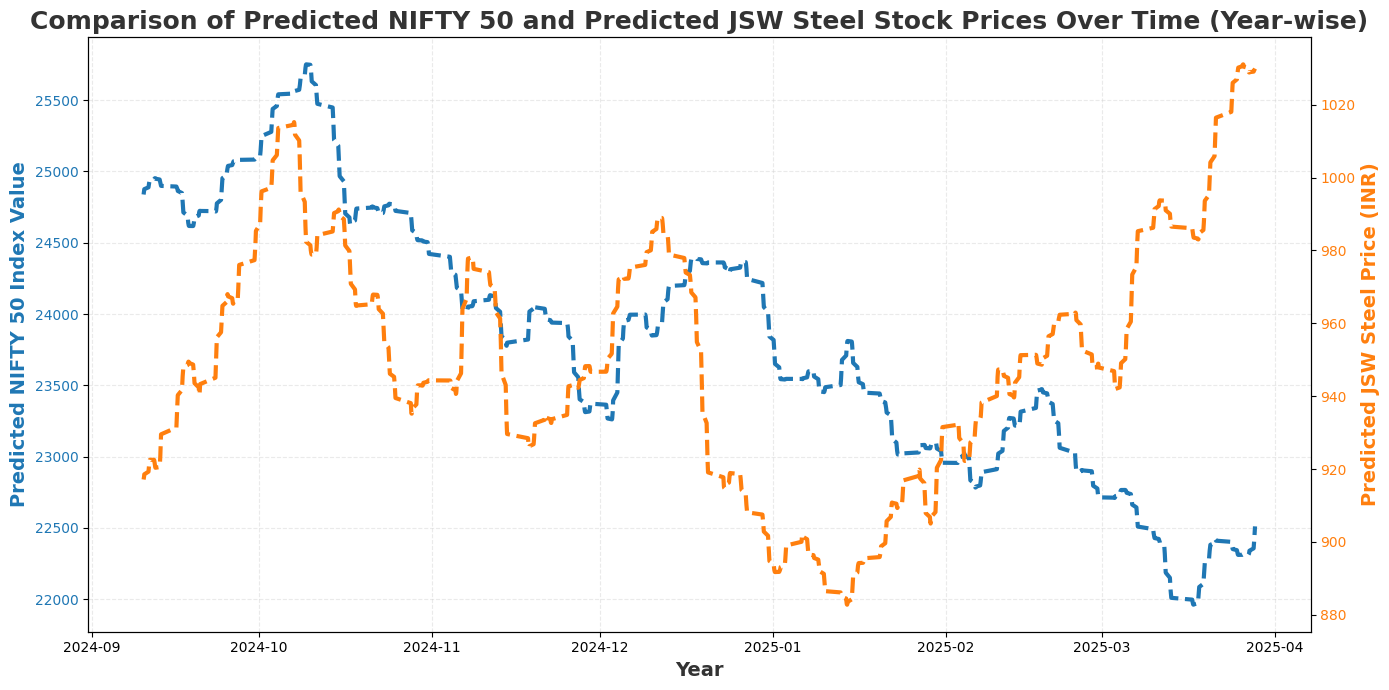

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure both datasets have the same timeframe
rb36tn52_common_dates = rb36tn52_nifty_data.index[rb36tn52_split + rb36tn52_time_step + 1:].intersection(rb36tn52_jsw_data.index[rb36tn52_split + rb36tn52_time_step + 1:])
rb36tn52_common_indices = np.where(rb36tn52_jsw_data.index[rb36tn52_split + rb36tn52_time_step + 1:].isin(rb36tn52_common_dates))[0]  # Get index positions

# Extract common prediction values using indices
rb36tn52_y_pred_nifty_common = rb36tn52_y_pred_nifty[rb36tn52_common_indices]
rb36tn52_y_pred_jsw_common = rb36tn52_y_pred_jsw[rb36tn52_common_indices]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot predicted NIFTY 50 on primary y-axis
ax1.plot(rb36tn52_common_dates, rb36tn52_y_pred_nifty_common, label='Predicted NIFTY 50 Index', color='#1f77b4', linestyle='--', linewidth=3)
ax1.set_xlabel('Year', fontsize=14, fontweight='bold', color='#333333')
ax1.set_ylabel('Predicted NIFTY 50 Index Value', color='#1f77b4', fontsize=14, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='#1f77b4')
ax1.grid(True, linestyle='--', alpha=0.4, color='#cccccc')

# Create secondary y-axis for predicted JSW Steel stock
ax2 = ax1.twinx()
ax2.plot(rb36tn52_common_dates, rb36tn52_y_pred_jsw_common, label='Predicted JSW Steel Stock Price', color='#ff7f0e', linestyle='--', linewidth=3)
ax2.set_ylabel('Predicted JSW Steel Price (INR)', color='#ff7f0e', fontsize=14, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='#ff7f0e')

# Set title and format x-axis
plt.title('Comparison of Predicted NIFTY 50 and Predicted JSW Steel Stock Prices Over Time (Year-wise)', fontsize=18, fontweight='bold', color='#333333')
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45, fontsize=12, color='#666666')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
# Merging NIFTY and JSW Steel data
rb36tn52_merged = pd.merge(rb36tn52_nifty_data['Close'], rb36tn52_jsw_data['Close'], left_index=True, right_index=True, suffixes=('_nifty', '_jswsteel'))

# Calculate Pearson correlation
rb36tn52_correlation = rb36tn52_merged['^NSEI'].corr(rb36tn52_merged['JSWSTEEL.NS'])
print(f"Correlation between actual Nifty50 score and JSW Steel Stock Price: {rb36tn52_correlation:.4f}")


Correlation between actual Nifty50 score and JSW Steel Stock Price: 0.9430


In [ ]:
# Calculate correlation using NumPy's corrcoef function
rb36tn52_correlation = np.corrcoef(rb36tn52_y_pred_nifty_common.flatten(), rb36tn52_y_pred_jsw_common.flatten())[0, 1]

print(f"Correlation between predicted Nifty50 and JSW Steel Stock prices: {rb36tn52_correlation:.2f}")


Correlation between predicted Nifty50 and JSW Steel Stock prices: 0.01


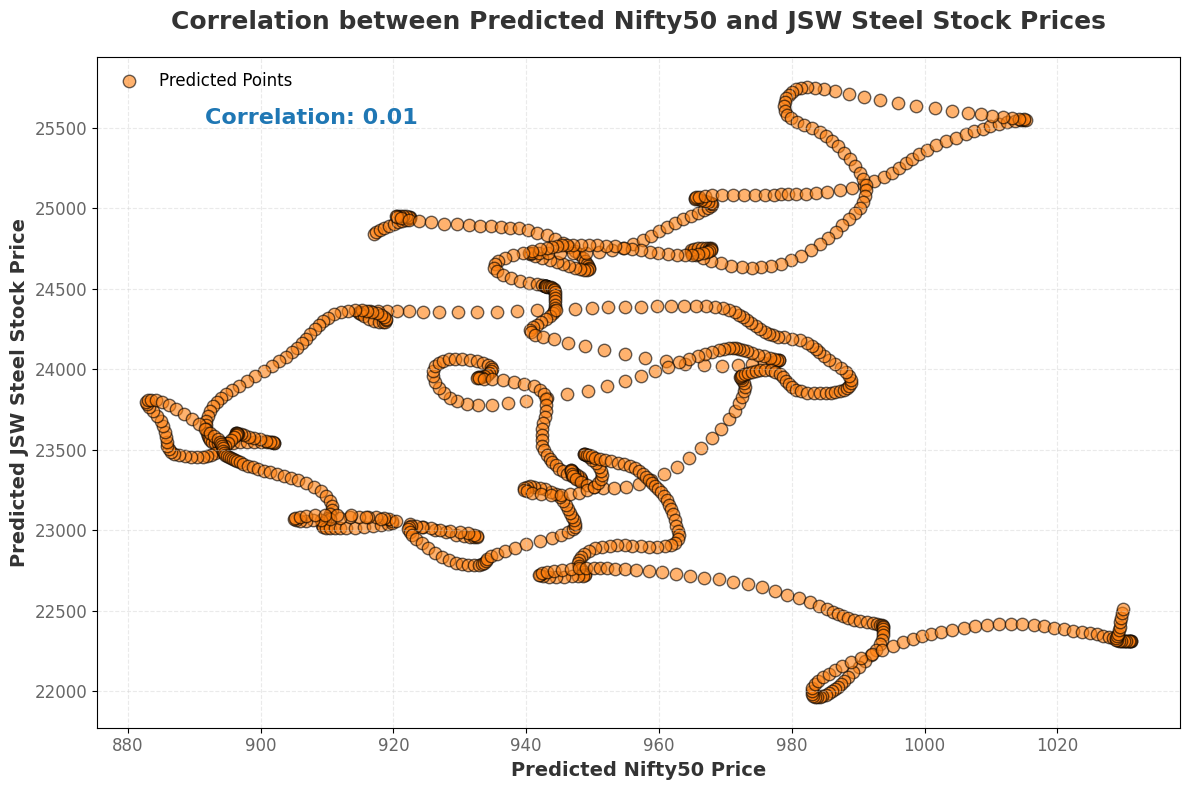

In [ ]:
# Create scatter plot with improved aesthetics
plt.figure(figsize=(12, 8))

# Scatter plot with color and size adjustments
plt.scatter(rb36tn52_y_pred_jsw_common, rb36tn52_y_pred_nifty_common,
            alpha=0.6, color='#ff7f0e', edgecolors='black', s=80, label="Predicted Points")

# Set plot title and labels with enhanced styling
plt.title('Correlation between Predicted Nifty50 and JSW Steel Stock Prices',
          fontsize=18, fontweight='bold', color='#333333', pad=20)
plt.xlabel('Predicted Nifty50 Price', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Predicted JSW Steel Stock Price', fontsize=14, fontweight='bold', color='#333333')

# Add correlation coefficient to the plot
plt.text(0.1, 0.9, f'Correlation: {rb36tn52_correlation:.2f}', transform=plt.gca().transAxes,
         fontsize=16, fontweight='bold', color='#1f77b4')

# Adjust grid style
plt.grid(True, linestyle='--', alpha=0.4, color='#cccccc')

# Add a legend
plt.legend(loc='upper left', fontsize=12, frameon=False)

# Format ticks for better readability
plt.xticks(fontsize=12, color='#666666')
plt.yticks(fontsize=12, color='#666666')

# Show the plot
plt.tight_layout()
plt.show()


# **HYPERPARAMETRIC TUNING**

# **Tuned Nifty50**

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Final Model Accuracy: 97.82%


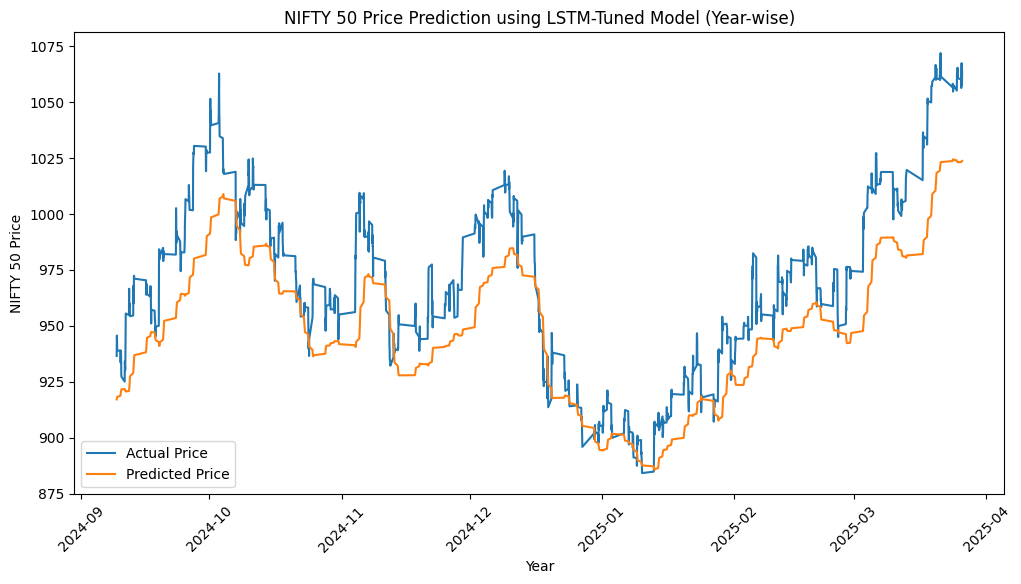

In [ ]:
# Predict on test data
rb36tn52_y_pred_nifty_tuned = rb36tn52_tuned_model.predict(rb36tn52_X_test)
rb36tn52_y_pred_nifty_tuned = rb36tn52_scaler.inverse_transform(rb36tn52_y_pred_nifty_tuned.reshape(-1, 1))
rb36tn52_y_test_actual_tuned = rb36tn52_scaler.inverse_transform(rb36tn52_y_test.reshape(-1, 1))

# Calculate accuracy using MAPE
rb36tn52_accuracy = 100 - rb36tn52_mape(rb36tn52_y_test_actual_tuned, rb36tn52_y_pred_nifty_tuned)
print(f"Final Model Accuracy: {rb36tn52_accuracy:.2f}%")

# Plot results year-wise
plt.figure(figsize=(12,6))
# Adjust the x-axis data to match the length of y_test_actual_tuned
plt.plot(rb36tn52_nifty_data.index[rb36tn52_split + rb36tn52_time_step + 1:rb36tn52_split + rb36tn52_time_step + 1 + len(rb36tn52_y_test_actual_tuned)], rb36tn52_y_test_actual_tuned, label='Actual Price')
plt.plot(rb36tn52_nifty_data.index[rb36tn52_split + rb36tn52_time_step + 1:rb36tn52_split + rb36tn52_time_step + 1 + len(rb36tn52_y_pred_nifty_tuned)], rb36tn52_y_pred_nifty_tuned, label='Predicted Price')
plt.xlabel('Year')
plt.ylabel('NIFTY 50 Price')
plt.xticks(rotation=45)
plt.legend()
plt.title('NIFTY 50 Price Prediction using LSTM-Tuned Model (Year-wise)')
plt.show()


# **Tuned JSW Steel**

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Final Tuned Model Accuracy: 97.82%


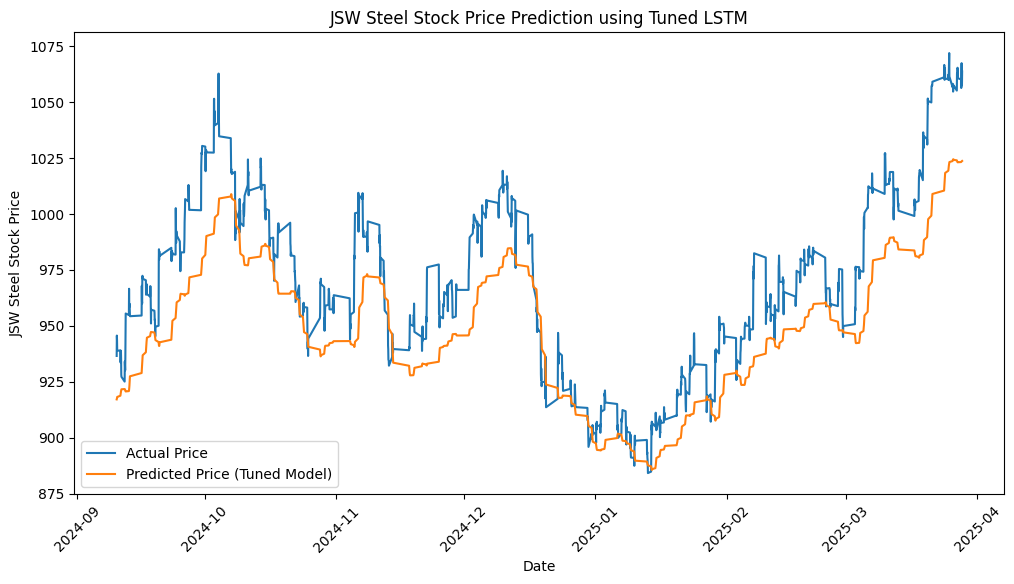

In [ ]:
# Predict on the test set using the tuned model
rb36tn52_y_pred_jsw_tuned = rb36tn52_tuned_model.predict(rb36tn52_X_test)
rb36tn52_y_pred_jsw_tuned = rb36tn52_scaler.inverse_transform(rb36tn52_y_pred_jsw_tuned.reshape(-1, 1))
rb36tn52_y_test_actual_tuned = rb36tn52_scaler.inverse_transform(rb36tn52_y_test.reshape(-1, 1))  # Correct inverse transform

# Define accuracy metric (Mean Absolute Percentage Error - MAPE)
def rb36tn52_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_idx = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[nonzero_idx] - y_pred[nonzero_idx]) / y_true[nonzero_idx])) * 100

# Calculate accuracy using MAPE
rb36tn52_accuracy_tuned = 100 - rb36tn52_mape(rb36tn52_y_test_actual_tuned, rb36tn52_y_pred_jsw_tuned)
print(f"Final Tuned Model Accuracy: {rb36tn52_accuracy_tuned:.2f}%")

# Plot results
plt.figure(figsize=(12,6))
plt.plot(rb36tn52_test_data.index[rb36tn52_time_step+1:], rb36tn52_y_test_actual_tuned, label='Actual Price')
plt.plot(rb36tn52_test_data.index[rb36tn52_time_step+1:], rb36tn52_y_pred_jsw_tuned, label='Predicted Price (Tuned Model)')
plt.xlabel('Date')
plt.ylabel('JSW Steel Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.title('JSW Steel Stock Price Prediction using Tuned LSTM')
plt.show()


### **Tuned Model**

In [ ]:
rb36tn52_tuned_model = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(rb36tn52_time_step, 1)),  # More units
    Dropout(0.3),  # Increased dropout
    LSTM(units=64, return_sequences=True),
    Dropout(0.3),
    LSTM(units=64),  # Increased units
    Dropout(0.3),
    Dense(units=32, activation='relu'),  # More neurons in Dense layer
    Dense(units=1)  # Output layer
])

rb36tn52_tuned_model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error', metrics=['mae'])

# Summary of the model
rb36tn52_tuned_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,057 (332.25 KB)

 Trainable params: 85,057 (332.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model and store training history
rb36tn52_history = rb36tn52_tuned_model.fit(rb36tn52_X_train, rb36tn52_y_train, epochs=20, batch_size=64, validation_data=(rb36tn52_X_test, rb36tn52_y_test), callbacks=[rb36tn52_EpochCallback()])


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.0532 - mae: 0.1551Epoch 1: Loss = 0.0199, Val Loss = 0.0014, MAE = 0.0879, Val MAE = 0.0297
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step - loss: 0.0527 - mae: 0.1540 - val_loss: 0.0014 - val_mae: 0.0297
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.0034 - mae: 0.0407Epoch 2: Loss = 0.0032, Val Loss = 0.0041, MAE = 0.0395, Val MAE = 0.0549
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - loss: 0.0034 - mae: 0.0406 - val_loss: 0.0041 - val_mae: 0.0549
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.0028 - mae: 0.0375Epoch 3: Loss = 0.0027, Val Loss = 0.0017, MAE = 0.0367, Val MAE = 0.0334
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - loss: 0.0028 - mae: 0.0374 - val_loss: 0.0017 - val_mae: 0.0334
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.0025 - mae: 0.0360Epoch 4: Loss = 0.0023, Val Loss = 0.0026, MAE = 0.0344, Val MAE = 0.0418
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - loss: 0.0025 - ma

In [ ]:
# Calculate accuracy using MAPE
rb36tn52_accuracy = 100 - rb36tn52_mape(rb36tn52_y_test_actual_tuned, rb36tn52_y_pred_nifty_tuned)
print(f"Final Model Accuracy: {rb36tn52_accuracy:.2f}%")


Final Model Accuracy: 97.82%


In [ ]:
# Save the tuned model
rb36tn52_tuned_model.save('LSTMTuned.keras')
